In [11]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
data = [
    {"luas": 1000, "harga": 1000, "kota": "Jakarta"},
    {"luas": 2000, "harga": 2000, "kota": "Jakarta"},
    {"luas": 3000, "harga": 3000, "kota": "Jakarta"},
    {"luas": 4000, "harga": 4000, "kota": "Jakarta"},
    {"luas": 5000, "harga": 5000, "kota": "Jakarta"},
    {"luas": 1000, "harga": 500, "kota": "Bogor"},
    {"luas": 2000, "harga": 1000, "kota": "Bogor"},
    {"luas": 3000, "harga": 1500, "kota": "Bogor"},
    {"luas": 4000, "harga": 2000, "kota": "Bogor"},
    {"luas": 5000, "harga": 2500, "kota": "Bogor"},
    {"luas": 1000, "harga": 2000, "kota": "Tangsel"},
    {"luas": 2000, "harga": 4000, "kota": "Tangsel"},
    {"luas": 3000, "harga": 6000, "kota": "Tangsel"},
    {"luas": 4000, "harga": 8000, "kota": "Tangsel"},
    {"luas": 5000, "harga": 10000, "kota": "Tangsel"}
]

df = pd.DataFrame(data)
df.corr()

,luas,harga
luas,1.00000,0.62361
harga,0.62361,1.00000


_kota tidak ditampilkan dalam korelasi karena berbentuk String_

ordinal = angka, ranking, degree, level

nominal = nama kota, warna

In [5]:
df

,luas,harga,kota
0,1000,1000,Jakarta
1,2000,2000,Jakarta
2,3000,3000,Jakarta
3,4000,4000,Jakarta
4,5000,5000,Jakarta
5,1000,500,Bogor
6,2000,1000,Bogor
7,3000,1500,Bogor
8,4000,2000,Bogor
9,5000,2500,Bogor


____

### Pandas Dummy Variable

In [4]:
dfDummy = pd.get_dummies(df["kota"])
dfDummy

,Bogor,Jakarta,Tangsel
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [9]:
dfNew = pd.concat([df, dfDummy], axis= "columns")
dfNew = dfNew.drop(["kota"], axis = 1)
dfNew

,luas,harga,Bogor,Jakarta,Tangsel
0,1000,1000,0,1,0
1,2000,2000,0,1,0
2,3000,3000,0,1,0
3,4000,4000,0,1,0
4,5000,5000,0,1,0
5,1000,500,1,0,0
6,2000,1000,1,0,0
7,3000,1500,1,0,0
8,4000,2000,1,0,0
9,5000,2500,1,0,0


In [10]:
dfNew.corr()

,luas,harga,Bogor,Jakarta,Tangsel
luas,1.000000e+00,0.623610,1.136868e-17,1.136868e-17,0.000000
harga,6.236096e-01,1.000000,-5.345225e-01,-1.336306e-01,0.668153
Bogor,1.136868e-17,-0.534522,1.000000e+00,-5.000000e-01,-0.500000
Jakarta,1.136868e-17,-0.133631,-5.000000e-01,1.000000e+00,-0.500000
Tangsel,0.000000e+00,0.668153,-5.000000e-01,-5.000000e-01,1.000000


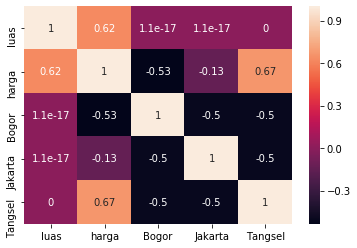

In [15]:
sb.heatmap(dfNew.corr(), annot= True)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(dfNew[["luas", "Bogor", "Tangsel"]], dfNew["harga"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
model.coef_

array([ 1.16666667e+00, -1.50000000e+03,  3.00000000e+03])

In [18]:
model.intercept_

-500.0000000000018

__Rumus__ $ y = c + m_{0}x_{0} + m_{1}x_{1} + m_{2}x_{2}$

Rumah seluas 1000 m2 di Jakarta, berapa harganya berdasarkan pemodelan?

In [19]:
model.predict([[1000, 0, 0]])

array([666.66666667])

#### Prediksi seluruh data

In [20]:
harga_pred = model.predict(dfNew[["luas", "Bogor", "Tangsel"]])
dfNew["hargaPred"] = harga_pred
dfNew

,luas,harga,Bogor,Jakarta,Tangsel,hargaPred
0,1000,1000,0,1,0,666.666667
1,2000,2000,0,1,0,1833.333333
2,3000,3000,0,1,0,3000.000000
3,4000,4000,0,1,0,4166.666667
4,5000,5000,0,1,0,5333.333333
5,1000,500,1,0,0,-833.333333
6,2000,1000,1,0,0,333.333333
7,3000,1500,1,0,0,1500.000000
8,4000,2000,1,0,0,2666.666667
9,5000,2500,1,0,0,3833.333333


____

### Label Encoder + One Hot Encoder Sklearn

In [25]:
dfUji = df
dfUji

,luas,harga,kota
0,1000,1000,Jakarta
1,2000,2000,Jakarta
2,3000,3000,Jakarta
3,4000,4000,Jakarta
4,5000,5000,Jakarta
5,1000,500,Bogor
6,2000,1000,Bogor
7,3000,1500,Bogor
8,4000,2000,Bogor
9,5000,2500,Bogor


#### Import Method

In [27]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [30]:
dfUji["kota"] = label.fit_transform(dfUji["kota"])
dfUji

,luas,harga,kota
0,1000,1000,1
1,2000,2000,1
2,3000,3000,1
3,4000,4000,1
4,5000,5000,1
5,1000,500,0
6,2000,1000,0
7,3000,1500,0
8,4000,2000,0
9,5000,2500,0


In [31]:
label.classes_

array([0, 1, 2])

Data kota diganti menjadi bentuk _class_ namun harus dilanjutkan ke fase **One Hot Encoder**

In [45]:
x = dfUji[["kota", "luas"]]
y = dfUji["harga"]

_data dipisah, harga dibuat menjadi data independen_

#### Import Method

In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    [("one_hot_encoder", OneHotEncoder(categories= "auto"), [0])], remainder= "passthrough"
)

ct.fit_transform(x)

array([[0.e+00, 1.e+00, 0.e+00, 1.e+03],
       [0.e+00, 1.e+00, 0.e+00, 2.e+03],
       [0.e+00, 1.e+00, 0.e+00, 3.e+03],
       [0.e+00, 1.e+00, 0.e+00, 4.e+03],
       [0.e+00, 1.e+00, 0.e+00, 5.e+03],
       [1.e+00, 0.e+00, 0.e+00, 1.e+03],
       [1.e+00, 0.e+00, 0.e+00, 2.e+03],
       [1.e+00, 0.e+00, 0.e+00, 3.e+03],
       [1.e+00, 0.e+00, 0.e+00, 4.e+03],
       [1.e+00, 0.e+00, 0.e+00, 5.e+03],
       [0.e+00, 0.e+00, 1.e+00, 1.e+03],
       [0.e+00, 0.e+00, 1.e+00, 2.e+03],
       [0.e+00, 0.e+00, 1.e+00, 3.e+03],
       [0.e+00, 0.e+00, 1.e+00, 4.e+03],
       [0.e+00, 0.e+00, 1.e+00, 5.e+03]])

In [47]:
x = np.array(ct.fit_transform(x),dtype = np.int64)
x

array([[   0,    1,    0, 1000],
       [   0,    1,    0, 2000],
       [   0,    1,    0, 3000],
       [   0,    1,    0, 4000],
       [   0,    1,    0, 5000],
       [   1,    0,    0, 1000],
       [   1,    0,    0, 2000],
       [   1,    0,    0, 3000],
       [   1,    0,    0, 4000],
       [   1,    0,    0, 5000],
       [   0,    0,    1, 1000],
       [   0,    0,    1, 2000],
       [   0,    0,    1, 3000],
       [   0,    0,    1, 4000],
       [   0,    0,    1, 5000]])

In [49]:
y

0      1000
1      2000
2      3000
3      4000
4      5000
5       500
6      1000
7      1500
8      2000
9      2500
10     2000
11     4000
12     6000
13     8000
14    10000
Name: harga, dtype: int64

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Untuk predict data, masukkan sesuai dengan urutan np array pada x </br>
[Bogor, Jakarta, Tangsel, Luas]

In [52]:
model.predict([[0, 1, 0, 1000]])

array([666.66666667])

In [53]:
dfUji["hargaPrediksi"] = model.predict(x)
dfUji

,luas,harga,kota,hargaPrediksi
0,1000,1000,1,666.666667
1,2000,2000,1,1833.333333
2,3000,3000,1,3000.000000
3,4000,4000,1,4166.666667
4,5000,5000,1,5333.333333
5,1000,500,0,-833.333333
6,2000,1000,0,333.333333
7,3000,1500,0,1500.000000
8,4000,2000,0,2666.666667
9,5000,2500,0,3833.333333
